In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime

In [2]:
df = pd.read_csv("data/reddit_wsb.csv")

In [3]:
df

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
37150,Could use some help here at the end of the day...,109,lt4i4u,https://i.redd.it/1rhnimof9vj61.jpg,37,1.614393e+09,NaN,2021-02-27 04:37:32
37151,The war has just begun,486,lt4fk0,https://v.redd.it/fcyia2xo8vj61,30,1.614393e+09,NaN,2021-02-27 04:34:21
37152,PSA: AMCX is not up because of AMC,33,lt4ci5,https://www.reddit.com/r/wallstreetbets/commen...,17,1.614393e+09,Tl;dr AMCX is a very undervalued company based...,2021-02-27 04:30:42
37153,Ape Combat 6: Liberation of Gamestopmeria,32,lt46qn,https://v.redd.it/x6b005am5vj61,3,1.614393e+09,NaN,2021-02-27 04:23:42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      37155 non-null  object 
 1   score      37155 non-null  int64  
 2   id         37155 non-null  object 
 3   url        37155 non-null  object 
 4   comms_num  37155 non-null  int64  
 5   created    37155 non-null  float64
 6   body       18718 non-null  object 
 7   timestamp  37155 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


## Timestamp

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df['timestamp'].describe()

<ipython-input-6-621d3f5dc36a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['timestamp'].describe()


count                   37155
unique                  27494
top       2021-01-29 01:03:59
freq                       14
first     2020-09-29 03:46:56
last      2021-03-02 16:56:47
Name: timestamp, dtype: object

In [7]:
time_df = df.sort_values(by='timestamp')
time_df.head()

,title,score,id,url,comms_num,created,body,timestamp
32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,https://www.reddit.com/r/wallstreetbets/commen...,11,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56
257,An autists journey. $150 to $68k in one month....,50,l6h58v,https://www.reddit.com/gallery/l6h58v,8,1.611818e+09,NaN,2021-01-28 09:08:16
256,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN,2021-01-28 09:08:17
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18
254,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\n\nTop 5 sec...,2021-01-28 09:08:19


In [8]:
min_date = df['timestamp'].min()
earliest_post_url = df.loc[ df['timestamp'] == min_date ]['url']
print(earliest_post_url.values[0])

https://www.reddit.com/r/wallstreetbets/comments/j1fmmo/cbat_sunw_spi_oxbr_yall_are_missing_the_point/


In [9]:
df_raw = df.copy()
df.drop(index=earliest_post_url.index[0], inplace=True)

## Nan

In [10]:
df.isna().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         18437
timestamp        0
dtype: int64

## Stats

In [11]:
df[['score', 'comms_num']].describe()

,score,comms_num
count,37154.000000,37154.000000
mean,1250.153066,169.009932
std,8299.947422,2189.751788
min,0.000000,0.000000
25%,1.000000,1.000000
50%,16.000000,9.000000
75%,142.000000,39.000000
max,348241.000000,89050.000000


In [12]:
df[['title', 'body']].describe()

,title,body
count,37154,18717
unique,36272,18477
top,AMC,Your daily trading discussion thread. Please k...
freq,39,17


## Histograms

In [13]:
def plot_hist(col):
    plt.figure(figsize=(14,6))
    plt.hist(df[col], bins=100)
    plt.plot()

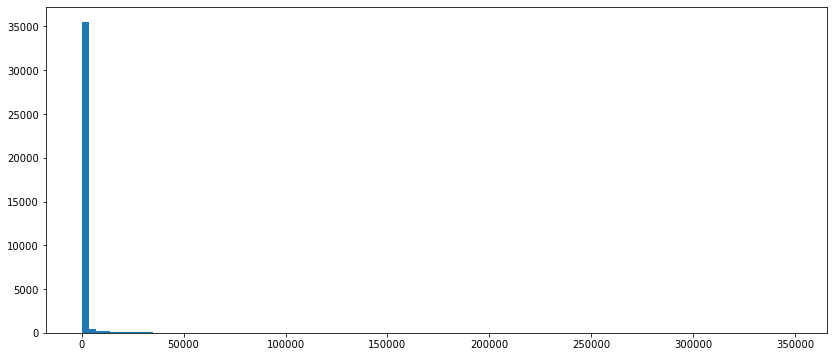

In [14]:
plot_hist('score')

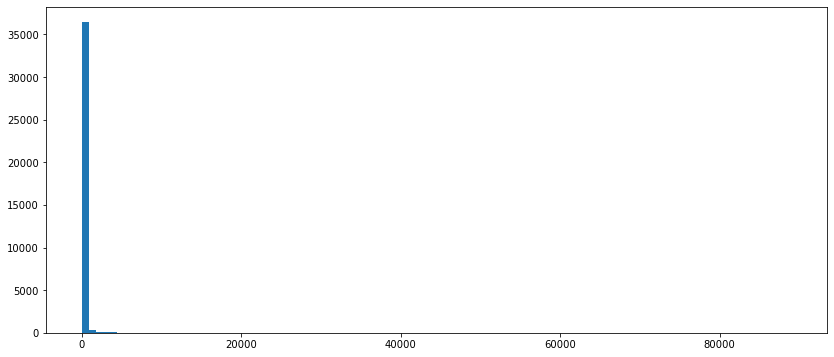

In [15]:
plot_hist('comms_num')

## Created

In [16]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

In [17]:
df['created_datetime'] = df['created'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

In [18]:
df[['created_datetime', 'timestamp']]

,created_datetime,timestamp
0,2021-01-28 19:37:41,2021-01-28 21:37:41
1,2021-01-28 19:32:10,2021-01-28 21:32:10
2,2021-01-28 19:30:35,2021-01-28 21:30:35
3,2021-01-28 19:28:57,2021-01-28 21:28:57
4,2021-01-28 19:26:56,2021-01-28 21:26:56
...,...,...
37150,2021-02-27 02:37:32,2021-02-27 04:37:32
37151,2021-02-27 02:34:21,2021-02-27 04:34:21
37152,2021-02-27 02:30:42,2021-02-27 04:30:42
37153,2021-02-27 02:23:42,2021-02-27 04:23:42


In [19]:
diff = df['timestamp'] - df['created_datetime']
diff.value_counts()

0 days 02:00:00    37154
dtype: int64

In [20]:
df.drop(['created_datetime', 'created'], axis=1, inplace=True)

## Plots

In [21]:
avg_1_day = df[['score', 'comms_num', 'date']].groupby('date').mean()
avg_1_day['date'] = avg_1_day.index

[]

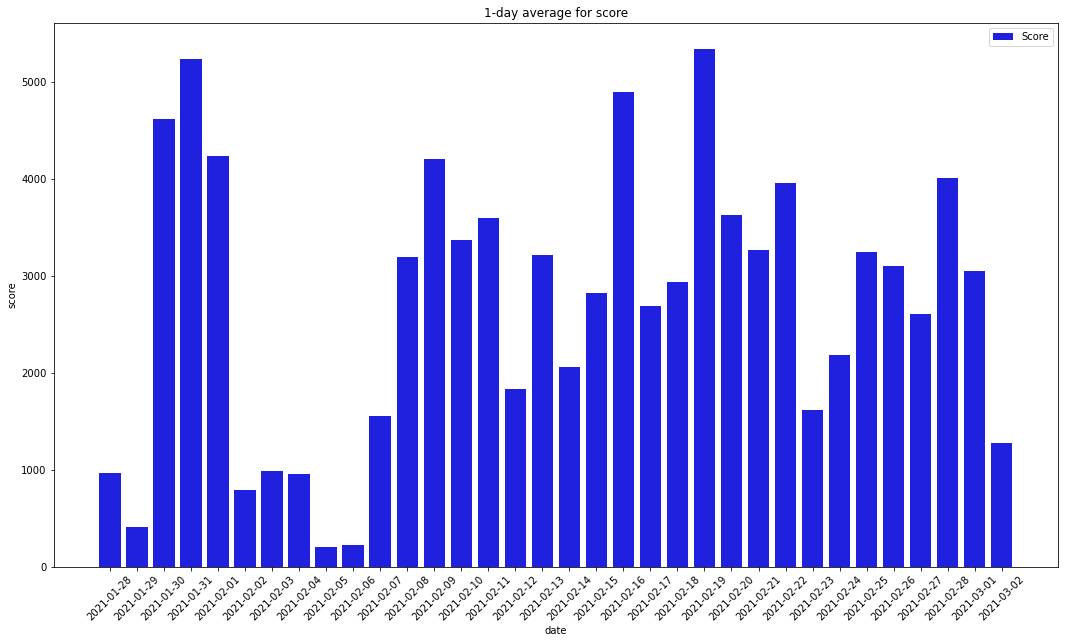

In [22]:
plt.figure(figsize=(18,10))
plt.title("1-day average for score")
sns.barplot(data=avg_1_day, x='date', y='score', color='b', label='Score')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

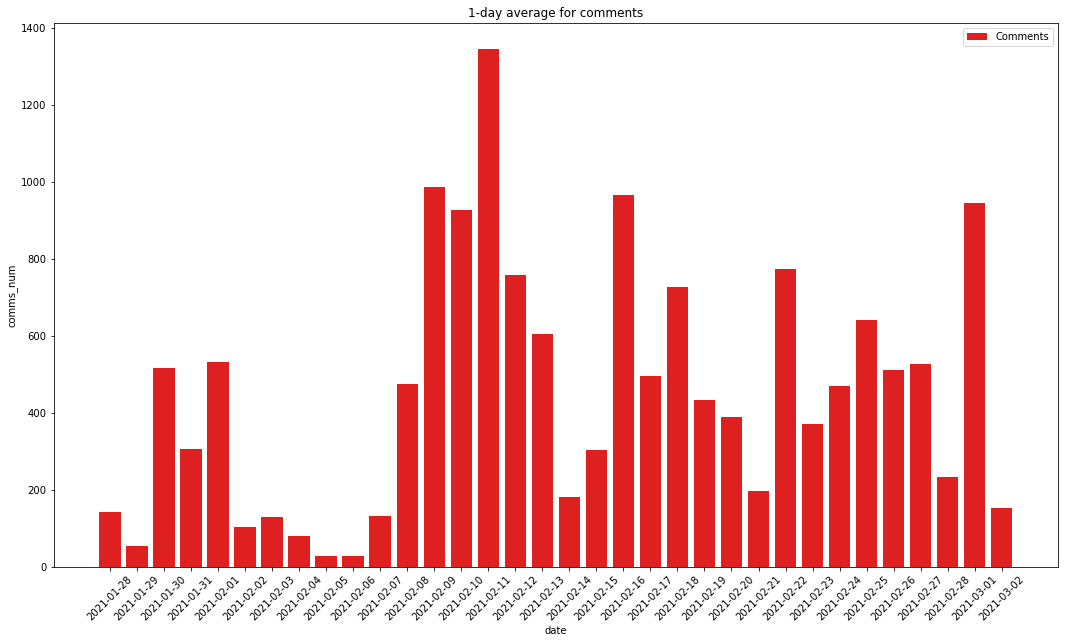

In [23]:
plt.figure(figsize=(18,10))
plt.title("1-day average for comments")
sns.barplot(data=avg_1_day, x='date', y='comms_num', color='r', label='Comments')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

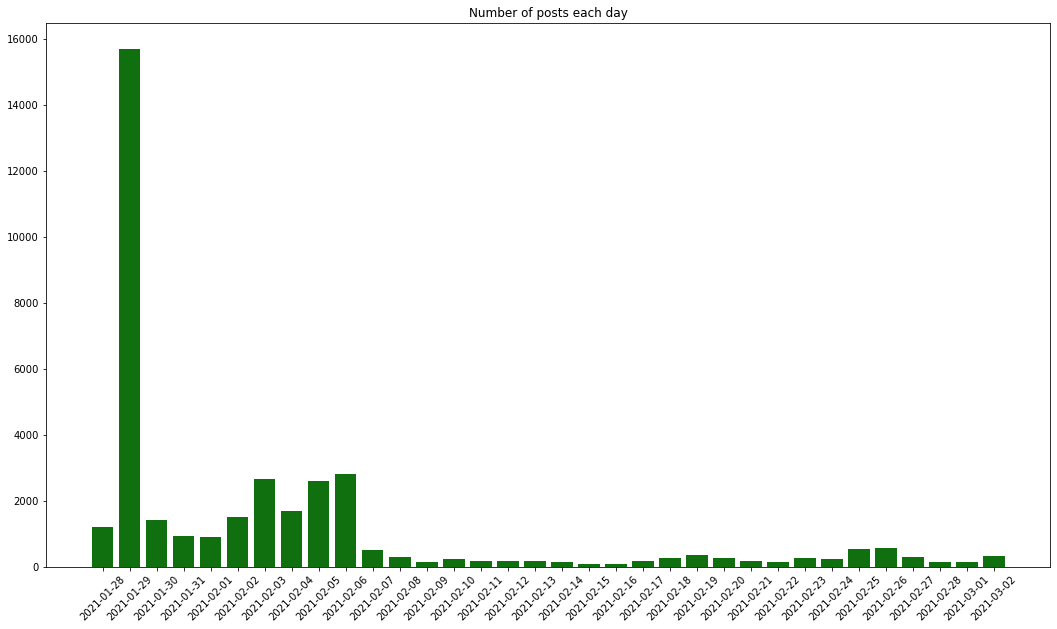

In [24]:
daily_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(18,10))
plt.title("Number of posts each day")
sns.barplot(daily_counts.index, daily_counts.values, color='g')
plt.xticks(rotation=45)
plt.plot()

## Weekday

[]

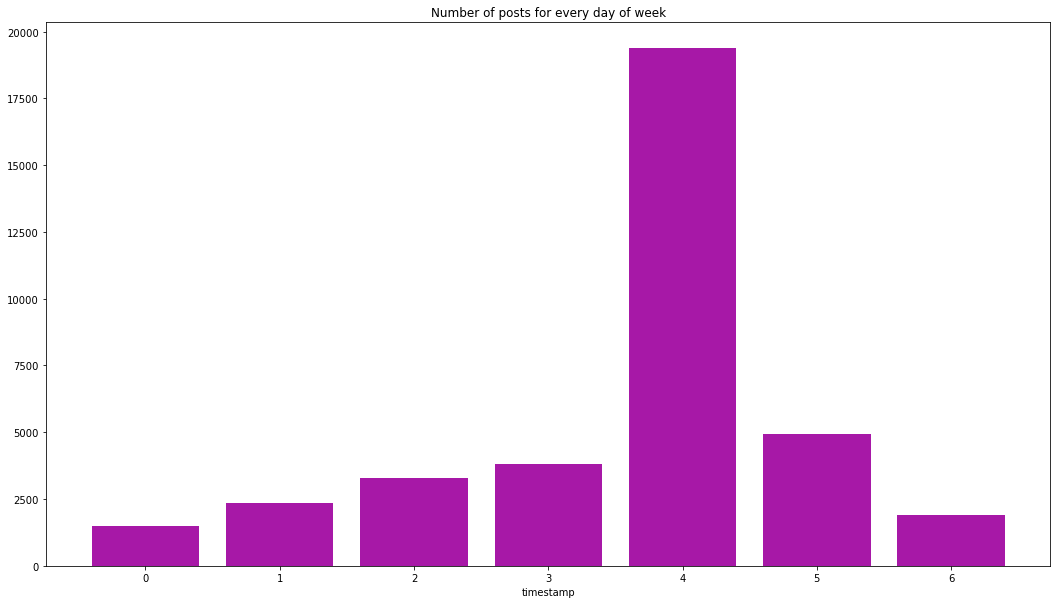

In [25]:
weekday = df['score'].groupby(df['timestamp'].dt.weekday).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every day of week")
sns.barplot(weekday.index, weekday.values, color='m')
plt.plot()

### Odfiltrowanie wartości z 29.01

[]

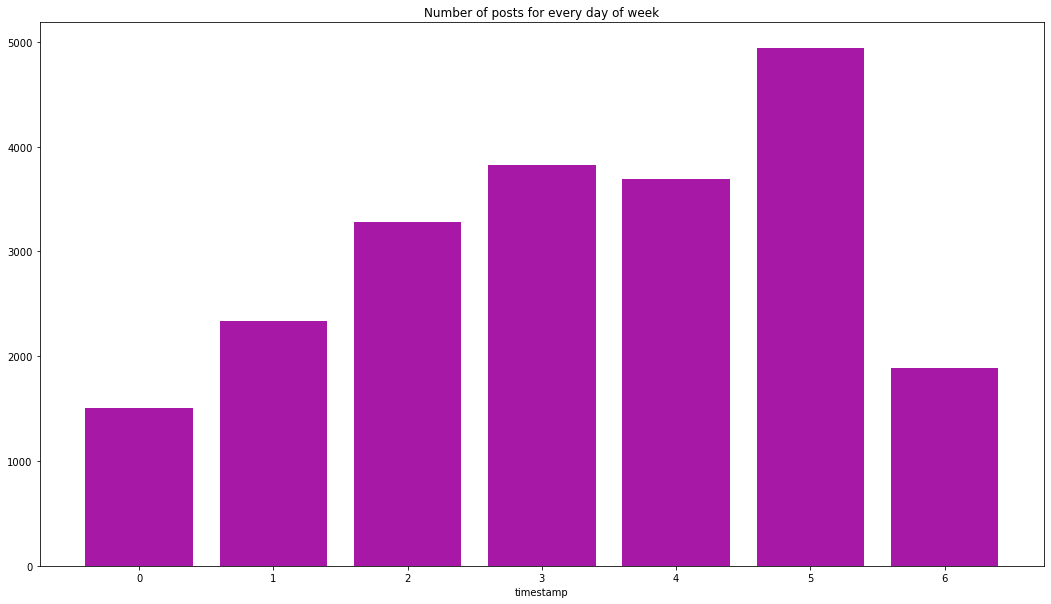

In [26]:
weekday_filtered = df['score'].loc[ df['date'] != datetime.date(2021,1,29) ].groupby(df['timestamp'].dt.weekday).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every day of week")
sns.barplot(weekday_filtered.index, weekday_filtered.values, color='m')
plt.plot()

## Hour

[]

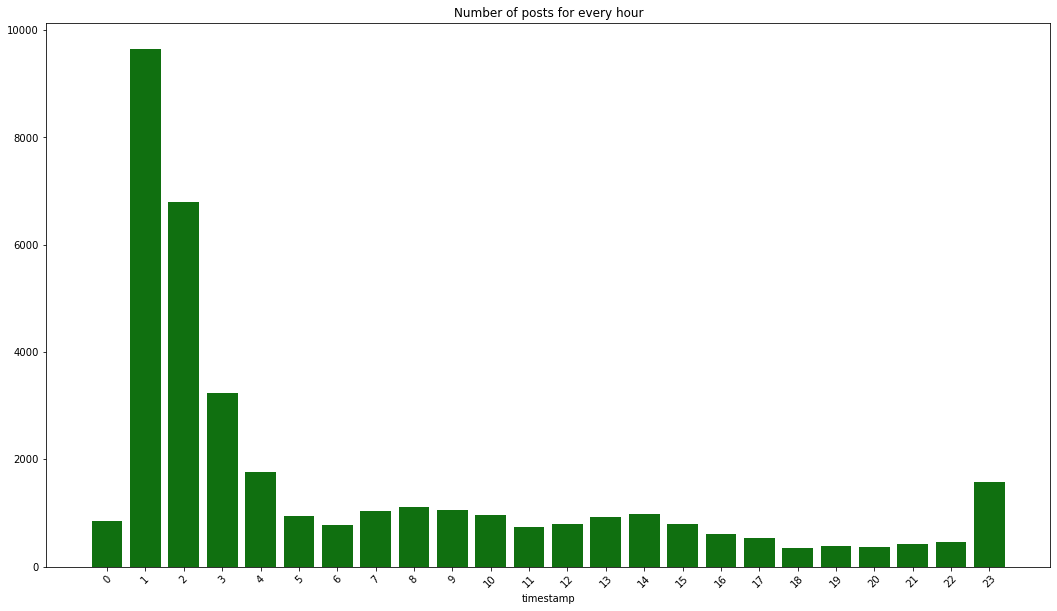

In [27]:
hourly = df['score'].groupby(df['timestamp'].dt.hour).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every hour")
sns.barplot(hourly.index, hourly.values, color='g')
plt.xticks(rotation=45)
plt.plot()

[]

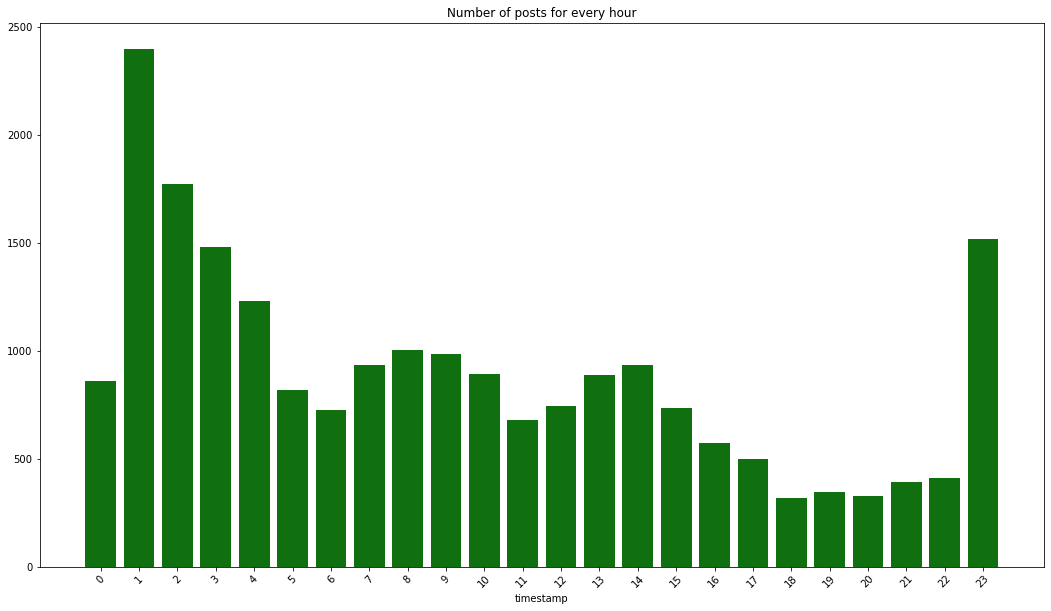

In [28]:
hourly_filtered = df['score'].loc[ df['date'] != datetime.date(2021,1,29) ].groupby(df['timestamp'].dt.hour).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every hour")
sns.barplot(hourly_filtered.index, hourly_filtered.values, color='g')
plt.xticks(rotation=45)
plt.plot()

[]

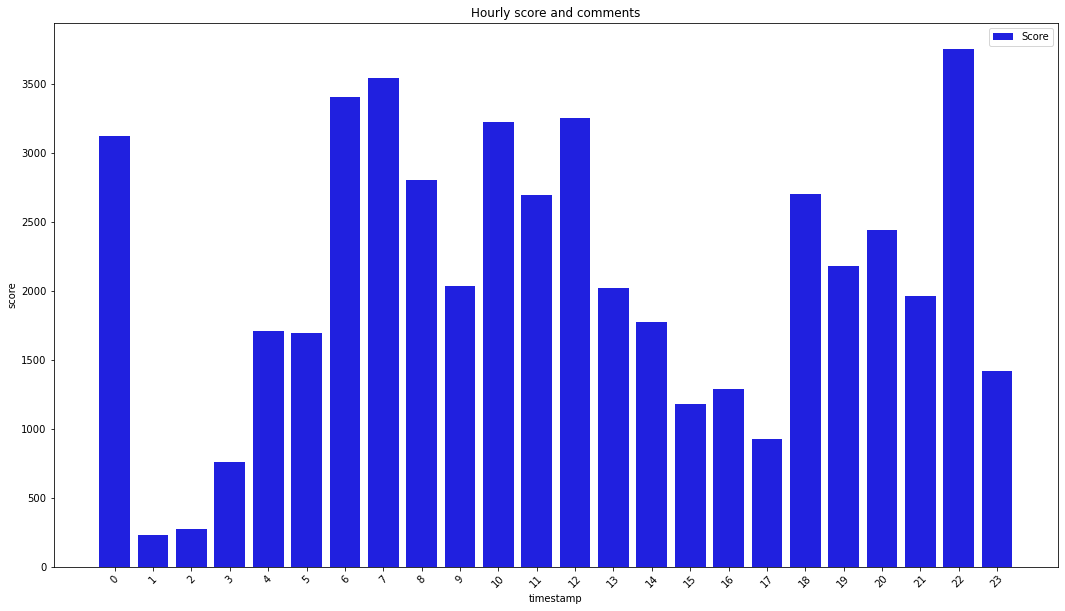

In [29]:
hourly_data = df[['score', 'comms_num']].groupby(df['timestamp'].dt.hour).mean()
hourly_data_filtered = df[['score', 'comms_num']].loc[ df['date'] != datetime.date(2021,1,29) ].groupby(df['timestamp'].dt.hour).mean()

plt.figure(figsize=(18,10))
plt.title("Hourly score and comments")
sns.barplot(data=hourly_data, x=hourly_data.index, y='score', color='b', label='Score')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

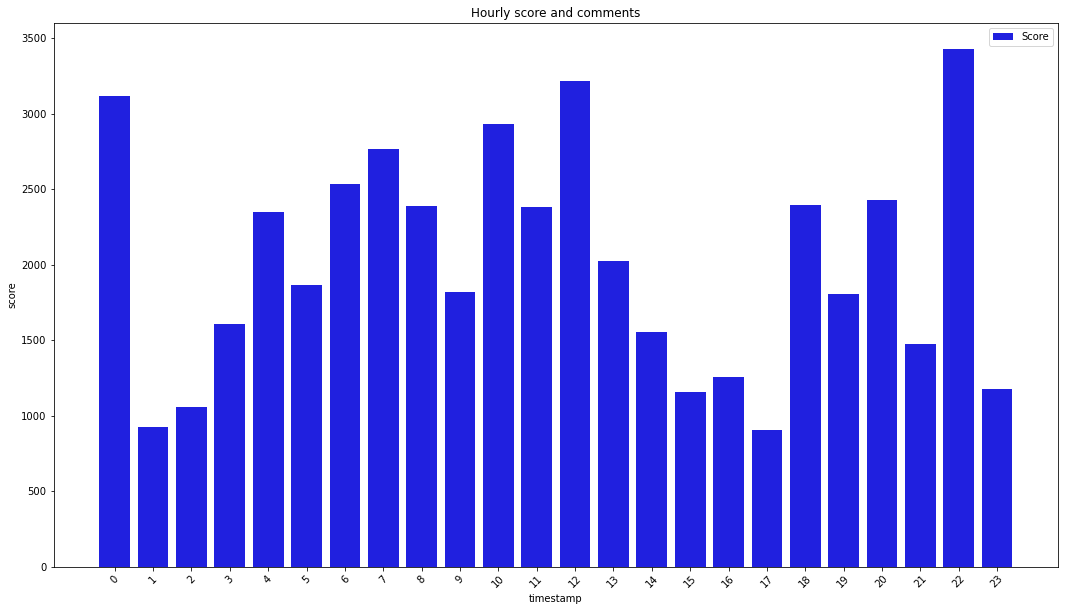

In [30]:
plt.figure(figsize=(18,10))
plt.title("Hourly score and comments")
sns.barplot(data=hourly_data_filtered, x=hourly_data_filtered.index, y='score', color='b', label='Score')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

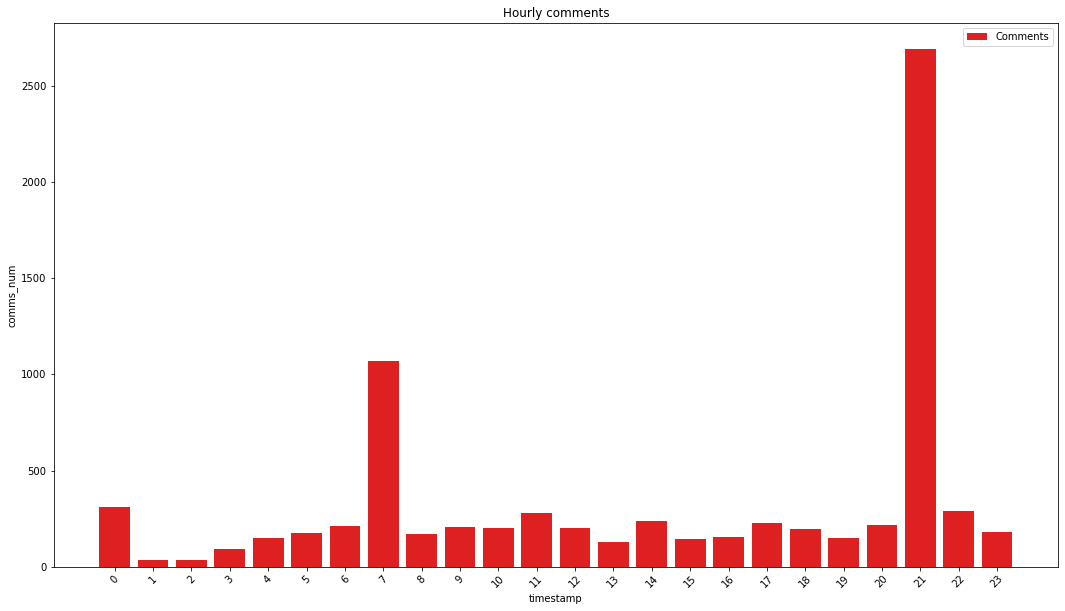

In [31]:
plt.figure(figsize=(18,10))
plt.title("Hourly comments")
sns.barplot(data=hourly_data, x=hourly_data.index, y='comms_num', color='r', label='Comments')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

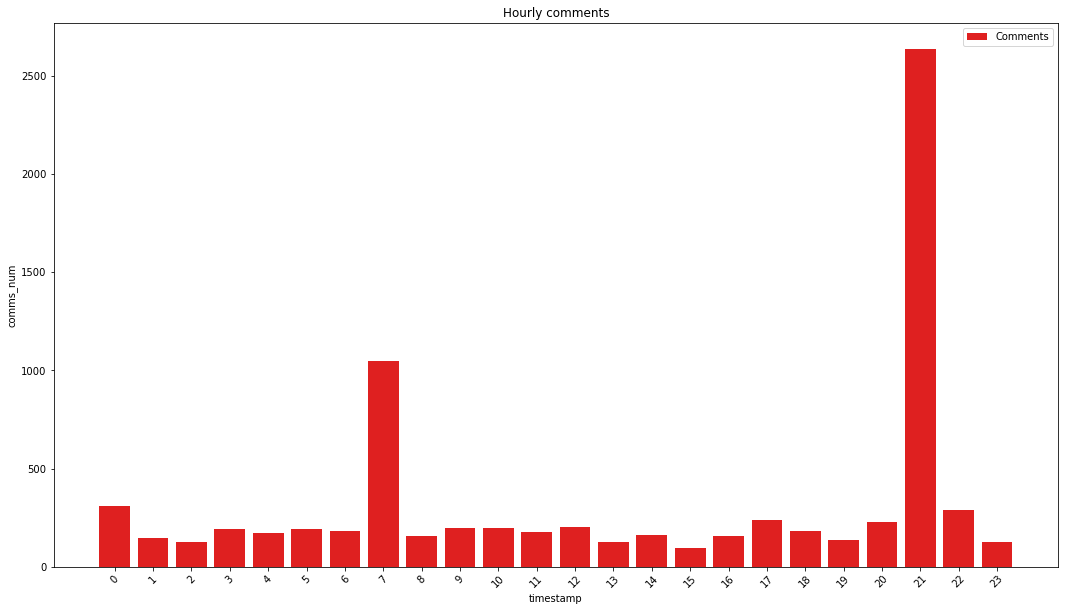

In [32]:
plt.figure(figsize=(18,10))
plt.title("Hourly comments")
sns.barplot(data=hourly_data_filtered, x=hourly_data_filtered.index, y='comms_num', color='r', label='Comments')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

## NLP

In [33]:
import spacy
import nltk
import re

from nltk.stem.porter import *

In [34]:
nlp = spacy.load("en_core_web_sm")

In [35]:
def transform_entities(x):
    if type(x) == spacy.tokens.doc.Doc:
        return x.ents
    return x

In [36]:
def lemmatization(x):
    if type(x) == spacy.tokens.doc.Doc:
        return [token.lemma_ for token in x if not token.is_stop and token.is_alpha]
    return x

In [37]:
df['title'] = df['title'].apply(lambda x: nlp(x))
df['title_raw'] = df['title']
df['title'] = df['title'].apply(lemmatization)

In [38]:
df['body'] = df['body'].apply(lambda x: nlp(x) if type(x) == str else x)
df['body_raw'] = df['body']
df['body'] = df['body'].apply(lemmatization)

## Attributes

In [39]:
def type_check(x):
    return type(x) == spacy.tokens.doc.Doc

def get_punct(x):
    if type_check(x):
        for token in x:
            if token.pos_ == 'PUNCT':
                return 1
    return 0

def get_caps(x):
    if type_check(x):
        caps_perc = 0
        title_len = 0
        for token in x:
            title_len += len(token.shape_)
            caps_perc += token.shape_.count('X')
        return caps_perc / title_len
    return 0.0


def get_urls(x):
    if type_check(x):
        urls = 0
        for token in x:
            if 'https' in str(token):
                urls += 1
        return urls
    return 0

def get_type(x):
    if 'v.redd' in x or 'youtube' in x or 'vimeo' in x:
        return 'video'
    if 'i.redd' in x or 'gallery' in x or 'imgur' in x:
        return 'image'
    if 'reddit' in x:
        return 'text'
    return 'other'

def get_features(df):
    df['title_length'] = df['title_raw'].apply(lambda x: len(x))
    df['title_capital'] = df['title_raw'].apply(get_caps)
    df['body_length'] = df['body_raw'].apply(lambda x: len(x) if type_check(x) else x)
    df['body_urls'] = df['body_raw'].apply(get_urls)
    df['body_punct'] = df['body_raw'].apply(get_punct)
    df['type'] = df['url'].apply(get_type)
    df['deleted'] = (df['type'] == 'text') & df['body'].isna()
    return df

In [40]:
df = get_features(df)

In [64]:
import emoji

EMOJIS = r"(\:[^ ][a-zA-Z0-9\s\_]*\:)"    

def get_emojis(x):
    res = re.findall(EMOJIS, x)
    return res

def decode_emojis(x):
    decoded = emoji.demojize(str(x))
    decoded = decoded.replace('::', ' ')
    emojis = get_emojis(decoded)
    
    emoji_list = []
    for emo in emojis:
        emo = emo.replace(':', '')
        emo = emo.split(" ")
        
        if type(emo) == list:
            emoji_list.extend(emo)
        else:
            emoji_list.append(emo)
        
    return emoji_list

In [78]:
df['title_emojis'] = df['title_raw'].apply(decode_emojis)
df['body_emojis'] = df['body_raw'].apply(decode_emojis)

In [81]:
df['title'] += df['title_emojis']
df['body'] += df['body_emojis']

In [83]:
df.drop(['title_emojis', 'body_emojis'], axis=1, inplace=True)

In [98]:
from collections import Counter

def get_vocab(data, n):
    words = Counter()
    for i in data.index:
        words.update(data.at[i])

    return words

In [99]:
df['body'] = df['body'].fillna(value='')
vocab = get_vocab(df['body'], 1000)

In [100]:
def show_histogram(word_counts, title=None):
    plot_df = pd.DataFrame.from_dict(word_counts).rename(columns={0:'Token', 1:'Count'})
    
    f, ax = plt.subplots(figsize=(12, 15))
    p = sns.barplot(x="Count", y="Token", data=plot_df, color="b")
    p.set(xlabel="Count", ylabel="", title=title)

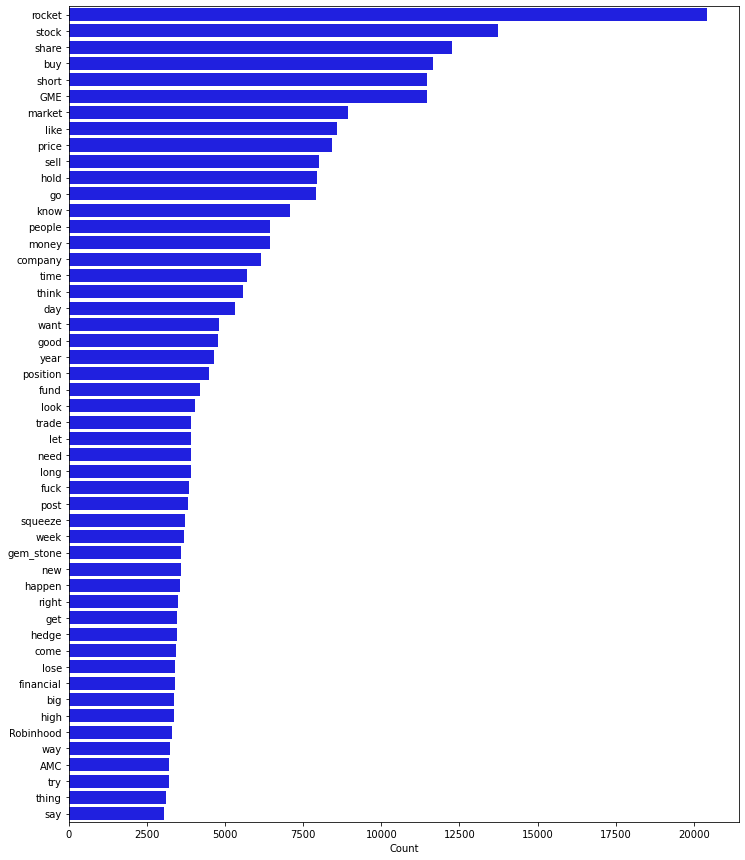

In [101]:
show_histogram(vocab.most_common(50))

In [102]:
def bag_of_words(x, most_freq):
    sent_vec = []
    for token in most_freq:
        if token in x:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    return sent_vec

In [108]:
feature_dict = [key for key, _ in vocab.most_common(200)]

df['body_bow'] = df['body'].apply(lambda x: bag_of_words(x, feature_dict))

In [109]:
df

,title,score,id,url,comms_num,body,timestamp,date,title_entities,title_raw,body_entities,body_raw,title_length,title_capital,body_length,body_urls,body_punct,type,deleted,body_bow
0,"[money, send, message, rocket, gem_stone, rais...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,,2021-01-28 21:37:41,2021-01-28,"((🚀),)","(It, 's, not, about, the, money, ,, it, 's, ab...",NaN,NaN,17,0.025000,NaN,0,0,video,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[Math, Professor, Scott, Steiner, say, number,...",110,l6uibd,https://v.redd.it/ah50lyny62e61,23,,2021-01-28 21:32:10,2021-01-28,"((Scott, Steiner),)","(Math, Professor, Scott, Steiner, says, the, n...",NaN,NaN,12,0.180000,NaN,0,0,video,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[exit, system]",0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,"[ceo, NASDAQ, push, halt, trading, investor, c...",2021-01-28 21:30:35,2021-01-28,(),"(Exit, the, system)","((NASDAQ), (SEC), (GME), (2))","(The, CEO, of, NASDAQ, pushed, to, halt, tradi...",3,0.090909,260.0,1,1,text,False,"[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, ..."
3,"[new, SEC, filing, GME, retarded, interpret]",29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,,2021-01-28 21:28:57,2021-01-28,"((SEC), (GME))","(NEW, SEC, FILING, FOR, GME, !, CAN, SOMEONE, ...",NaN,NaN,15,0.957447,NaN,0,0,other,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[distract, GME, think, AMC, brother, aware]",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,,2021-01-28 21:26:56,2021-01-28,"((GME), (AMC))","(Not, to, distract, from, GME, ,, just, though...",NaN,NaN,16,0.137255,NaN,0,0,image,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37150,"[use, help, end, day, boy]",109,lt4i4u,https://i.redd.it/1rhnimof9vj61.jpg,37,,2021-02-27 04:37:32,2021-02-27,"((the, end, of, the, day),)","(Could, use, some, help, here, at, the, end, o...",NaN,NaN,12,0.025000,NaN,0,0,image,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
37151,"[war, begin]",486,lt4fk0,https://v.redd.it/fcyia2xo8vj61,30,,2021-02-27 04:34:21,2021-02-27,(),"(The, war, has, just, begun)",NaN,NaN,5,0.058824,NaN,0,0,video,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
37152,"[psa, AMCX, AMC]",33,lt4ci5,https://www.reddit.com/r/wallstreetbets/commen...,17,"[AMCX, undervalued, company, base, EV, EBITDA,...",2021-02-27 04:30:42,2021-02-27,"((PSA), (AMCX), (AMC))","(PSA, :, AMCX, is, not, up, because, of, AMC)","((AMCX), (EV, /, EBITDA), (SOTP), (AMCX), (tod...","(Tl;dr, AMCX, is, a, very, undervalued, compan...",9,0.416667,394.0,0,1,text,False,"[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
37153,"[Ape, Combat, liberation, Gamestopmeria]",32,lt46qn,https://v.redd.it/x6b005am5vj61,3,,2021-02-27 04:23:42,2021-02-27,"((Ape, Combat),)","(Ape, Combat, 6, :, Liberation, of, Gamestopme...",NaN,NaN,7,0.181818,NaN,0,0,video,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [43]:
df[['title_length', 'title_capital', 'body_length', 'body_urls']].describe()

,title_length,title_capital,body_length,body_urls
count,37154.000000,37154.000000,18717.000000,37154.000000
mean,13.468509,0.254769,186.179249,0.298810
std,10.783371,0.289241,379.572207,1.732001
min,1.000000,0.000000,1.000000,0.000000
25%,6.000000,0.062500,21.000000,0.000000
50%,10.000000,0.134328,61.000000,0.000000
75%,17.000000,0.285714,192.000000,0.000000
max,142.000000,1.000000,7645.000000,80.000000


In [44]:
df['body_punct'].sum() / df['body_length'].count()

0.9115777101031148

In [47]:
df['body_urls'].sum() / df['body_length'].count()

0.5931506117433349

In [43]:
df['deleted'].sum() / df['body_length'].count()

0.17144841587861304

[]

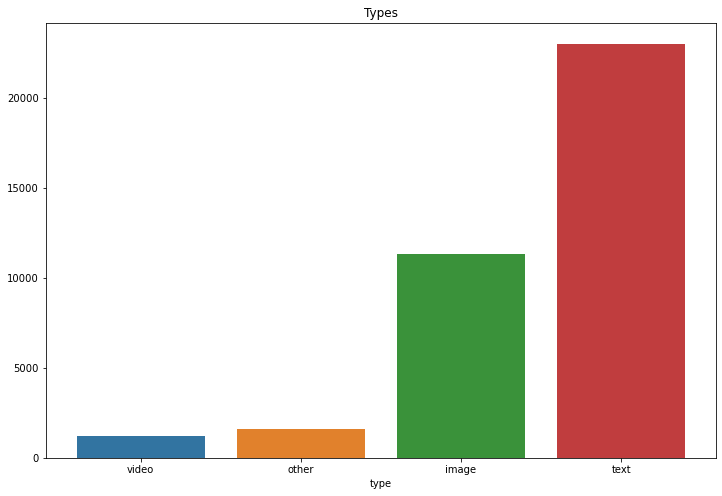

In [45]:
types = df['type'].value_counts()

plt.figure(figsize=(12,8))
plt.title("Types")
ax = sns.barplot(data=types, x=types.index, y=types.values)
ax.set_xticklabels(reversed(types.index))
plt.plot()

## Save csv

In [46]:
df.to_csv("data/wsb_interim.csv")